In [2]:
from google.colab import files
uploaded = files.upload()

Saving cut_df.csv to cut_df.csv


In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['cut_df.csv']))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10520 entries, 0 to 10519
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               10520 non-null  int64 
 1   ID                       10519 non-null  object
 2   Status                   10519 non-null  object
 3   City                     803 non-null    object
 4   Age                      1457 non-null   object
 5   Gender                   1400 non-null   object
 6   Symptoms                 142 non-null    object
 7   Hospitalised (Y/N/NA)    208 non-null    object
 8   Isolated (Y/N/NA)        323 non-null    object
 9   Travel_history (Y/N/NA)  265 non-null    object
 10  Confirmation_method      96 non-null     object
dtypes: int64(1), object(10)
memory usage: 904.2+ KB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
ID,1
Status,1
City,9717
Age,9063
Gender,9120
Symptoms,10378
Hospitalised (Y/N/NA),10312
Isolated (Y/N/NA),10197
Travel_history (Y/N/NA),10255


In [ ]:
df["Status"].unique()

array(['confirmed', 'discarded', 'suspected', nan, 'omit_error'],
      dtype=object)

In [ ]:
df["Status"]=df["Status"].apply(lambda x: 1 if x=='confirmed' else(0 if x=='discarded' else(2 if x=='suspected' else x)))

In [ ]:
import statistics
df["Status"].fillna(statistics.mode(df["Status"]),inplace=True)

<ipython-input-8-26508f49b953>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Status"].fillna(statistics.mode(df["Status"]),inplace=True)


In [ ]:
df["Status"][df["Status"]=='omit_error']=statistics.mode(df["Status"])

In [ ]:
df["Status"].unique()

array([1, 0, 2], dtype=object)

In [ ]:
df["Gender"].unique()

array([nan, 'Male', 'Female', '2022-06-03'], dtype=object)

In [ ]:
import statistics

# Calculate the mode, excluding NaN and invalid values
valid_values = df["Gender"][df["Gender"] != '2022-06-03']
mode = statistics.mode(valid_values.dropna())

# Fill NaN values with the mode
df["Gender"].fillna(mode, inplace=True)

# Replace '2022-06-03' with the mode
df["Gender"] = df["Gender"].apply(lambda x: mode if x == '2022-06-03' else x)

# Check the unique values after processing
print(df["Gender"].unique())


['Male' 'Female']


<ipython-input-12-1b8de7d0d634>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(mode, inplace=True)


In [ ]:
df["Hospitalised (Y/N/NA)"].unique()

array(['Y', 'N', nan], dtype=object)

In [ ]:
df["Hospitalised (Y/N/NA)"]=df["Hospitalised (Y/N/NA)"].apply(lambda x: 1 if x=='Y' else (0 if x=='N' else x))

In [ ]:
df["Hospitalised (Y/N/NA)"].unique()

array([ 1.,  0., nan])

In [ ]:
import statistics
df["Hospitalised (Y/N/NA)"].fillna(statistics.mode(df["Hospitalised (Y/N/NA)"].dropna()),inplace=True)

<ipython-input-16-3817165f817d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Hospitalised (Y/N/NA)"].fillna(statistics.mode(df["Hospitalised (Y/N/NA)"].dropna()),inplace=True)


In [ ]:
df["Hospitalised (Y/N/NA)"].unique()

array([1., 0.])

In [ ]:
df["Isolated (Y/N/NA)"].unique()

array(['Y', nan], dtype=object)

In [ ]:
df["Isolated (Y/N/NA)"]=df["Isolated (Y/N/NA)"].apply(lambda x:1 if x=='Y' else x)

In [ ]:
index=df.loc[pd.isna(df["Isolated (Y/N/NA)"]), :].index

In [ ]:
import random
for i in index:
  rand=random.randint(0,1)
  df["Isolated (Y/N/NA)"][i]=rand

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Isolated (Y/N/NA)"][i]=rand
<ipython-input-21-9af8db37be16>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Isolated (Y/N/NA)"][i]=rand
<ipython-input-21-9af8db37be16>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are sett

In [ ]:
df["Travel_history (Y/N/NA)"]=df["Travel_history (Y/N/NA)"].apply(lambda x: 1 if x=='Y' else(0 if x=='N' else x))

In [ ]:
df["Travel_history (Y/N/NA)"].unique()

array([ 1.,  0., nan])

In [ ]:
import statistics

In [ ]:
df["Travel_history (Y/N/NA)"].fillna(statistics.mode(df["Travel_history (Y/N/NA)"].dropna()),inplace=True)

<ipython-input-25-5f417fd9d645>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Travel_history (Y/N/NA)"].fillna(statistics.mode(df["Travel_history (Y/N/NA)"].dropna()),inplace=True)


In [ ]:
df['Symptoms'].unique()

array(['rash', 'vesicular rash', 'skin lesions, ulcerative lesions',
       'ulcerative lesions', nan, 'oral and genital ulcers, fever',
       'lesions', 'perianal papules; inguinal adenopathy',
       'genital ulcers', 'genital rash',
       'Slight swallowing difficulties and an elevated temperature',
       'fever, rash', 'skin rashes', 'fever, lesions', 'pustules, fever',
       'skin lesions', 'fever, cough, skin lesions',
       'fever, pustules on hands, body pains', 'blisters, high fever',
       'genital ulcer lesions', 'muscle aches, fever, skin lesions',
       'blisters', 'fever, skin lesions',
       'erythema with vesicles and papules, difficulty breathing, headache, fever',
       'skin lesions, spots on skin, severe anemia',
       'skin lesions, headaches, enlarged lymph nodes, fever',
       'fever, fatigue, headache, muscle pain',
       'skin rashes, dysphagia, muscle pain, fever, decreased physical strength, enlarged lymph nodes',
       'fever, outbreak on the sk

In [ ]:
df['Symptoms'].isna().sum()

10378

In [ ]:
import statistics
mode=statistics.mode(df["Symptoms"].dropna())
df["Symptoms"].fillna(mode,inplace=True)

<ipython-input-28-6d907d8d26c9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Symptoms"].fillna(mode,inplace=True)


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Symptoms']=label_encoder.fit_transform(df['Symptoms'])

In [ ]:
df['Symptoms'].isna().sum()

0

In [ ]:
df["Confirmation_method"].unique()

array(['RT-PCR', nan, 'Molecular and gene sequencing', 'qPCR or RT-PCR',
       'PCR', 'Electron microscopy', 'Sequencing', 'Microbiological Test',
       'PCR and sequencing'], dtype=object)

In [ ]:
df["Confirmation_method"].isna().sum()

10424

In [ ]:
import statistics
mode=statistics.mode(df["Confirmation_method"].dropna())
df["Confirmation_method"].fillna(mode,inplace=True)

<ipython-input-33-2941c1e3e454>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Confirmation_method"].fillna(mode,inplace=True)


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Confirmation_method']=label_encoder.fit_transform(df['Confirmation_method'])

In [ ]:
np.sum(df["Confirmation_method"]==3)

9

In [ ]:
df["Age"].unique()

array([nan, '20-44', '30-59', '40-44', '25-29', '20-59', '30-34', '20-64',
       '40-49', '30-39', '50-59', '35-39', '15-74', '15-19', '15-39',
       '55-59', '45-49', '20-24', '30-50', '50-54', '10-14', '70-74',
       '15-64', '60-64', '65-69', '25-49', '40-45', '26-54', '5-9',
       '22-55', '30-54', '0-5', '30-49', '20-29', '40-42', '15-69',
       '20-50', '45-50', '35-40', '50-55', '20-69', '34-46', '20-62',
       '25-34', '35-44', '45-54', '55-64', '5-14', '20-39', '36-50',
       '25-39', '19-24', '20-60', '23-46', '25-53'], dtype=object)

In [ ]:
import statistics
mode=statistics.mode(df["Age"].dropna())
df["Age"].fillna(mode,inplace=True)

<ipython-input-37-adb6c44af733>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(mode,inplace=True)


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Age']=label_encoder.fit_transform(df['Age'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10520 entries, 0 to 10519
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10520 non-null  int64  
 1   ID                       10519 non-null  object 
 2   Status                   10520 non-null  object 
 3   City                     803 non-null    object 
 4   Age                      10520 non-null  int64  
 5   Gender                   10520 non-null  object 
 6   Symptoms                 10520 non-null  int64  
 7   Hospitalised (Y/N/NA)    10520 non-null  float64
 8   Isolated (Y/N/NA)        10520 non-null  float64
 9   Travel_history (Y/N/NA)  10520 non-null  float64
 10  Confirmation_method      10520 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 904.2+ KB


In [ ]:
for i in df.columns:
  print(df[i].isna().sum())

0
1
0
9717
0
0
0
0
0
0
0


In [ ]:
df['City'].unique()

array(['London', 'Newcastle', 'Lisbon', 'Madrid', 'Boston', 'South East',
       nan, 'Montreal', 'Stockholm', 'Rome', 'Gran Canaria',
       'Ã®le-de-France', 'Antwerp', 'Sydney', 'Melbourne', 'Munich',
       'Costa del Sol', 'Tenerife', 'Tel Aviv', 'Barcelona', 'Berlin',
       'Bern', 'Toronto', 'Kefalonia', 'Ashkelon', 'Aragon', 'Vienna',
       'LiÃ¨ge', 'Buenos Aires', 'Arezzo', 'Valencia', 'Ortenaukreis',
       'Fuerteventura', 'Jerichower Land', 'Prague', 'Lyon', 'Malaga',
       'Seville', 'Cadiz', 'Frankfurt', 'Lombardy', 'Palermo',
       'Canicatti', 'Toulouse', 'Cologne', 'Ansbach', 'Hus', 'Valladolid',
       'VÃ¤stra GÃ¶taland', 'Bologna', 'Dusseldorf', 'Genoa', 'Milan',
       'MÃ¼nster', 'Denver', 'Aachen', 'Quito', 'Ancona', 'Sukkur',
       'Brussels', 'Potsdam', 'Nonthaburi', 'Piura', 'Porto Alegre',
       'Almeria', 'Fortaleza', 'Dionisio Cerqueira', 'Hamburg', 'Lucca',
       'Monza', 'Brescia', 'KÃ¶ln (Cologne)', 'Gibraltar', 'GÃ¼nzburg',
       'Coesfeld', 'S

In [ ]:
df['City'].isna().sum()

9717

In [ ]:
most_common_city = statistics.mode(df["City"].dropna())
df["City"].fillna(most_common_city, inplace=True)


<ipython-input-43-b4162186e4cc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["City"].fillna(most_common_city, inplace=True)


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['City']=label_encoder.fit_transform(df['City'])

In [ ]:
df.to_csv('update.csv')
files.download('update.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files

# Prompt file upload
print("Please upload the 'update.csv' file from your local machine:")
uploaded = files.upload()

# Load the dataset from the uploaded file
df = pd.read_csv("update.csv")

# Display the first few rows of the dataset to get an initial look
print("First 5 rows of the dataset:")
print(df.head())

# Check for any missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Show basic info to see column types and non-null counts
print("\nDataset Information:")
print(df.info())

# Summary statistics for numerical columns
print("\nStatistical Summary of Numerical Columns:")
print(df.describe())


Please upload the 'update.csv' file from your local machine:


Saving update.csv to update (1).csv
First 5 rows of the dataset:
   Unnamed: 0.1  Unnamed: 0  ID  Status  City  Age Gender  Symptoms  \
0             0           0  N1       1    83    6   Male        44   
1             1           1  N2       1    83    6   Male        44   
2             2           2  N3       1    83    6   Male        59   
3             3           3  N4       1    83    6   Male        59   
4             4           4  N5       1    83    6   Male        59   

   Hospitalised (Y/N/NA)  Isolated (Y/N/NA)  Travel_history (Y/N/NA)  \
0                    1.0                1.0                      1.0   
1                    1.0                1.0                      0.0   
2                    0.0                1.0                      0.0   
3                    1.0                1.0                      0.0   
4                    1.0                1.0                      0.0   

   Confirmation_method  
0                    5  
1                    5  


In [ ]:
# Drop 'ID' columns
df.drop(columns=["ID"], inplace=True)

# Verify the changes
print(df.info())
print("\nFirst few rows after dropping 'ID':")
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10520 entries, 0 to 10519
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0.1             10520 non-null  int64  
 1   Unnamed: 0               10520 non-null  int64  
 2   Status                   10520 non-null  int64  
 3   City                     10520 non-null  int64  
 4   Age                      10520 non-null  int64  
 5   Gender                   10520 non-null  object 
 6   Symptoms                 10520 non-null  int64  
 7   Hospitalised (Y/N/NA)    10520 non-null  float64
 8   Isolated (Y/N/NA)        10520 non-null  float64
 9   Travel_history (Y/N/NA)  10520 non-null  float64
 10  Confirmation_method      10520 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 904.2+ KB
None

First few rows after dropping 'ID':
   Unnamed: 0.1  Unnamed: 0  Status  City  Age Gender  Symptoms  \
0             0 

In [ ]:
# Convert 'Gender' column to numerical values using label encoding
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Verify the changes
print("Updated 'Gender' column:")
print(df['Gender'].head())


Updated 'Gender' column:
0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64


In [ ]:
# Drop the unnecessary columns
df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True)

# Verify the changes
print("Updated DataFrame Info:")
print(df.info())
print("\nFirst few rows after dropping unnecessary columns:")
print(df.head())


Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10520 entries, 0 to 10519
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Status                   10520 non-null  int64  
 1   City                     10520 non-null  int64  
 2   Age                      10520 non-null  int64  
 3   Gender                   10520 non-null  int64  
 4   Symptoms                 10520 non-null  int64  
 5   Hospitalised (Y/N/NA)    10520 non-null  float64
 6   Isolated (Y/N/NA)        10520 non-null  float64
 7   Travel_history (Y/N/NA)  10520 non-null  float64
 8   Confirmation_method      10520 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 739.8 KB
None

First few rows after dropping unnecessary columns:
   Status  City  Age  Gender  Symptoms  Hospitalised (Y/N/NA)  \
0       1    83    6       1        44                    1.0   
1       1    83    6       1       

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                           Status      City       Age    Gender  Symptoms  \
Status                   1.000000  0.073615 -0.005827  0.071823 -0.016675   
City                     0.073615  1.000000 -0.185873  0.055318 -0.110219   
Age                     -0.005827 -0.185873  1.000000 -0.057170  0.097466   
Gender                   0.071823  0.055318 -0.057170  1.000000 -0.009314   
Symptoms                -0.016675 -0.110219  0.097466 -0.009314  1.000000   
Hospitalised (Y/N/NA)   -0.039003 -0.282638  0.158113 -0.126609  0.032164   
Isolated (Y/N/NA)        0.003152 -0.053454  0.066418 -0.013264  0.003896   
Travel_history (Y/N/NA) -0.002236  0.123092 -0.151690 -0.003395 -0.412641   
Confirmation_method      0.003628  0.054417 -0.070123  0.086019  0.003322   

                         Hospitalised (Y/N/NA)  Isolated (Y/N/NA)  \
Status                               -0.039003           0.003152   
City                                 -0.282638          -0.053454   
Ag

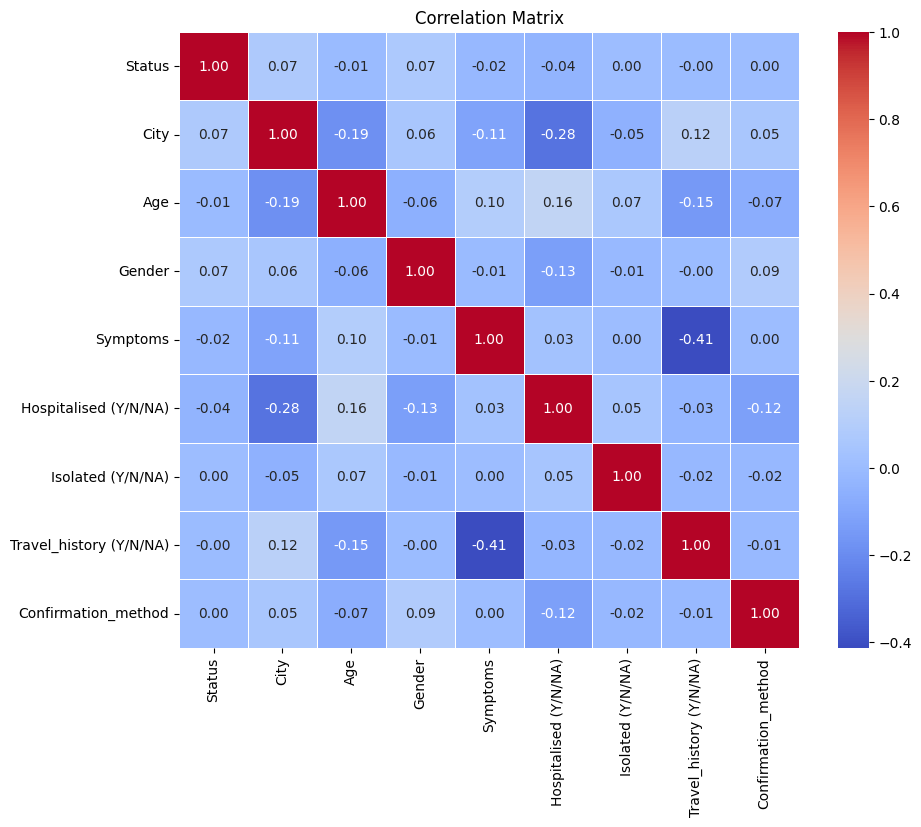

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


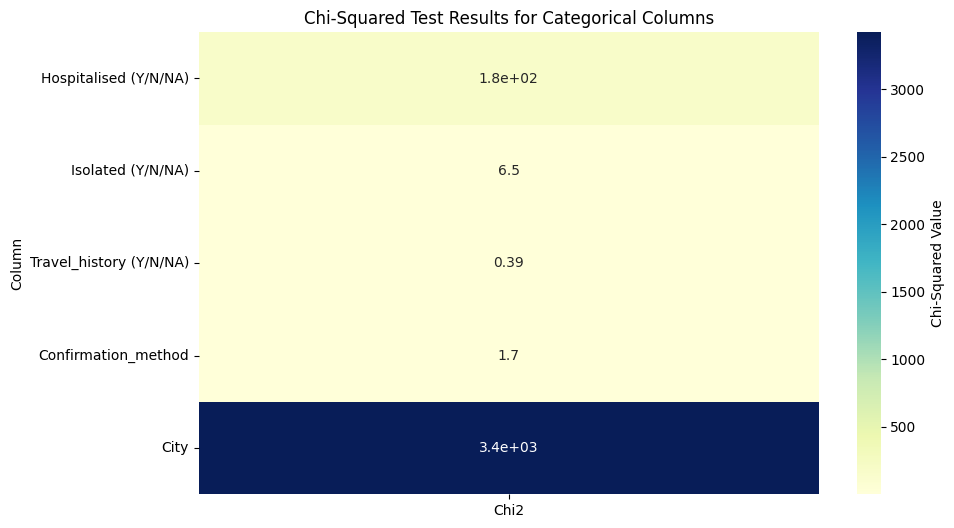

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame


categorical_columns = ['Hospitalised (Y/N/NA)', 'Isolated (Y/N/NA)', 'Travel_history (Y/N/NA)', 'Confirmation_method','City']

results = []

for col in categorical_columns:
    # Create contingency table
    contingency_table = pd.crosstab(df['Status'], df[col])

    # Perform Chi-Squared Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append((col, chi2, p))

# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(results, columns=['Column', 'Chi2', 'p-value'])

# Set 'Column' as the index
results_df.set_index('Column', inplace=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(results_df[['Chi2']], annot=True, cmap='YlGnBu', cbar_kws={'label': 'Chi-Squared Value'})

plt.title('Chi-Squared Test Results for Categorical Columns')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
X = df.drop(columns=['Status'])
y = df['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9695817490494296
[[   0   59    0]
 [   1 2040    0]
 [   0    4    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.97      1.00      0.98      2041
           2       0.00      0.00      0.00         4

    accuracy                           0.97      2104
   macro avg       0.32      0.33      0.33      2104
weighted avg       0.94      0.97      0.96      2104



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

# **DecisionTree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.970532319391635
[[   7   52    0]
 [   7 2034    0]
 [   1    2    1]]
              precision    recall  f1-score   support

           0       0.47      0.12      0.19        59
           1       0.97      1.00      0.99      2041
           2       1.00      0.25      0.40         4

    accuracy                           0.97      2104
   macro avg       0.81      0.46      0.52      2104
weighted avg       0.96      0.97      0.96      2104



# **RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9729087452471483
[[   7   52    0]
 [   2 2039    0]
 [   0    3    1]]
              precision    recall  f1-score   support

           0       0.78      0.12      0.21        59
           1       0.97      1.00      0.99      2041
           2       1.00      0.25      0.40         4

    accuracy                           0.97      2104
   macro avg       0.92      0.46      0.53      2104
weighted avg       0.97      0.97      0.96      2104



# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9700570342205324
[[   0   59    0]
 [   0 2041    0]
 [   0    4    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.97      1.00      0.98      2041
           2       0.00      0.00      0.00         4

    accuracy                           0.97      2104
   macro avg       0.32      0.33      0.33      2104
weighted avg       0.94      0.97      0.96      2104



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **KNN MODEL**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.969106463878327
[[   2   57    0]
 [   4 2037    0]
 [   1    3    0]]
              precision    recall  f1-score   support

           0       0.29      0.03      0.06        59
           1       0.97      1.00      0.98      2041
           2       0.00      0.00      0.00         4

    accuracy                           0.97      2104
   macro avg       0.42      0.34      0.35      2104
weighted avg       0.95      0.97      0.96      2104



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **GradientBoosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_model = GradientBoostingClassifier()

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9686311787072244
[[   1   57    1]
 [   4 2036    1]
 [   0    3    1]]
              precision    recall  f1-score   support

           0       0.20      0.02      0.03        59
           1       0.97      1.00      0.98      2041
           2       0.33      0.25      0.29         4

    accuracy                           0.97      2104
   macro avg       0.50      0.42      0.43      2104
weighted avg       0.95      0.97      0.96      2104



# **NEURAL NETWORK**

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize the model
mlp_model = MLPClassifier()

# Train the model
mlp_model.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9695817490494296
[[   0   59    0]
 [   0 2040    1]
 [   0    4    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.97      1.00      0.98      2041
           2       0.00      0.00      0.00         4

    accuracy                           0.97      2104
   macro avg       0.32      0.33      0.33      2104
weighted avg       0.94      0.97      0.96      2104



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame
X = df.drop(columns=['Status'])
y = df['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),

    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Neural Network', MLPClassifier())
]

# Train and evaluate each model
results = []

for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))

# Print the accuracy of each model
print("Model Performance:")
for name, accuracy in results:
    print(f"{name}: {accuracy:.4f}")

# Optionally, you can convert the results to a DataFrame for a better display
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
print(results_df)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Performance:
Logistic Regression: 0.9696
Decision Tree: 0.9696
Random Forest: 0.9724
Gradient Boosting: 0.9686
SVM: 0.9701
KNN: 0.9691
Neural Network: 0.9696
                 Model  Accuracy
0  Logistic Regression  0.969582
1        Decision Tree  0.969582
2        Random Forest  0.972433
3    Gradient Boosting  0.968631
4                  SVM  0.970057
5                  KNN  0.969106
6       Neural Network  0.969582


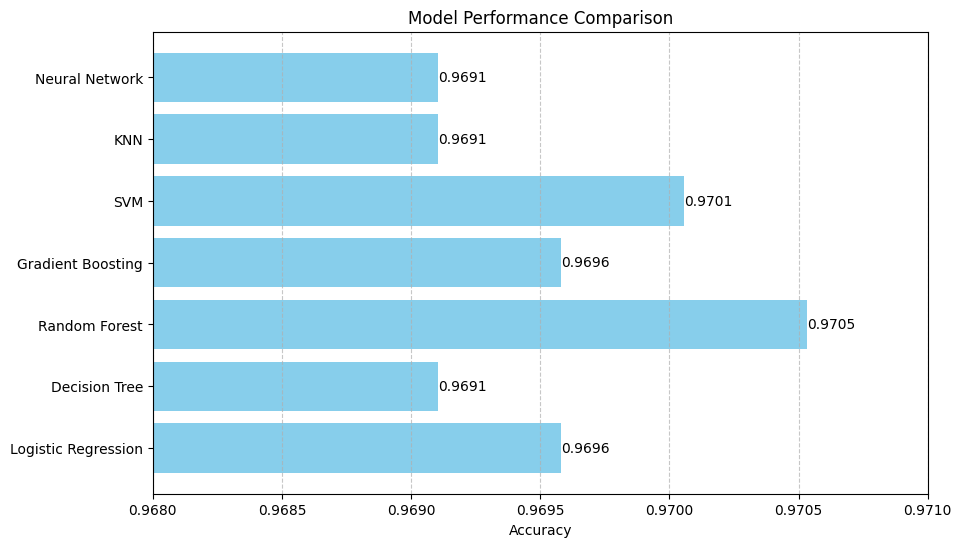

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Model': [
        'Logistic Regression', 'Decision Tree', 'Random Forest',
        'Gradient Boosting', 'SVM', 'KNN', 'Neural Network'
    ],
    'Accuracy': [
        0.969582, 0.969106, 0.970532,
        0.969582, 0.970057, 0.969106, 0.969106
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(df['Model'], df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xlim(0.968, 0.971)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the accuracy values on the bars
for index, value in enumerate(df['Accuracy']):
    plt.text(value, index, f"{value:.4f}", va='center')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:551: RuntimeWarning: invalid value encountered in divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


NaN values found in probabilities for Decision Tree. Replacing NaNs with 0.


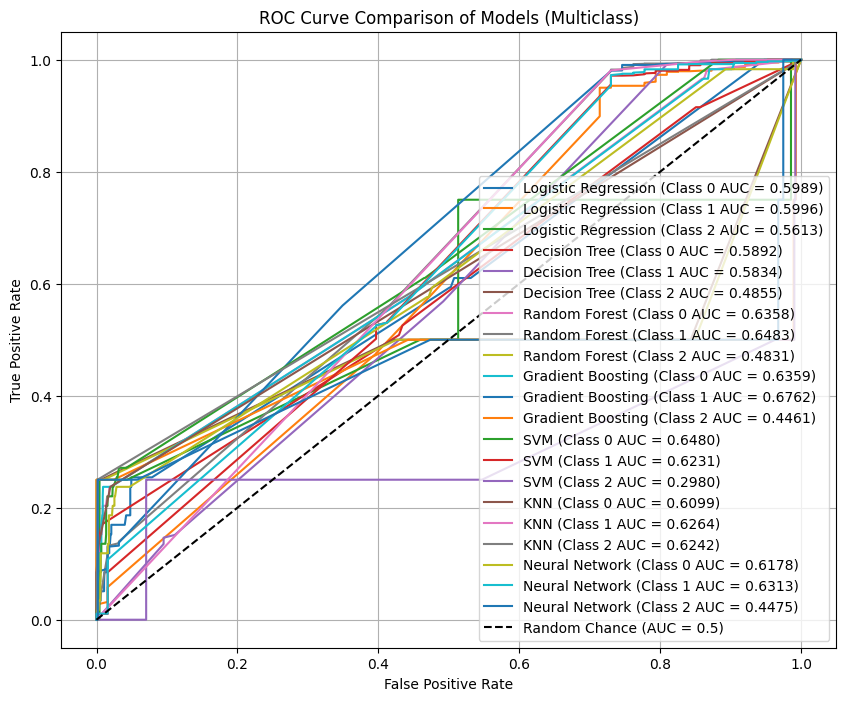

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Sample data: X, y
# Ensure X and y are defined appropriately in your environment
# X, y = ...

# Split the data into training and testing sets with test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for better convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Binarize labels for multiclass roc curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust classes list to match your labels

# Define the models with increased max_iter for Logistic Regression and MLP
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Plotting the ROC curve for each model
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    try:
        # Use OneVsRestClassifier to handle multiclass for each model
        clf = OneVsRestClassifier(model)
        clf.fit(X_train, y_train)

        # Get the predicted probabilities for each class
        y_prob = clf.predict_proba(X_test)

        # Check for NaN values in predicted probabilities and replace them if found
        if np.isnan(y_prob).any():
            print(f"NaN values found in probabilities for {model_name}. Replacing NaNs with 0.")
            y_prob = np.nan_to_num(y_prob, nan=0.0)

        # Calculate the ROC curve and AUC for each class
        for i in range(y_test_bin.shape[1]):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            roc_auc = auc(fpr, tpr)

            # Plot the ROC curve for each class
            plt.plot(fpr, tpr, label=f'{model_name} (Class {i} AUC = {roc_auc:.4f})')

    except ValueError as e:
        print(f"Error with {model_name}: {e}")

# Plot the random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Models (Multiclass)')
plt.legend(loc='lower right')
plt.grid()

plt.show()
